## Exponential Smoothing Methods

The moving averages takes into account only the most recent observations with equal weights. More often than not, we want to give more weights on recent observations than past observations.

- *Exponential smoothing* continually revises an estimate in the light of more-recent experiences.
- The most recent observation receives the largest weight $\alpha$ (where $0<\alpha<1$); the next most recent observation receives less weight, $\alpha(1-\alpha)$; the observation two time periods in the past receives even less weight, $\alpha(1-\alpha)^2$; and so forth.
- One representation of exponential smoothing is
\begin{equation}
\hat{Y}_{t+1} = \alpha Y_t + (1-\alpha) \hat{Y}_t \tag{13}
\end{equation}
- Here, a smoothing constant, $\alpha$, serves as the weighting factor.
- When $\alpha=1$, the new forecast will be essentially the current observation, or identical to the naive method.
- When $\alpha$ is close to zero, the new forecast will be very close to the old forecast, and the current observation will have very little impact.
- Therefore, the value assigned to $\alpha$ is the key to the analysis. <font color="red">How do we choose a right value of $\alpha$?</font>

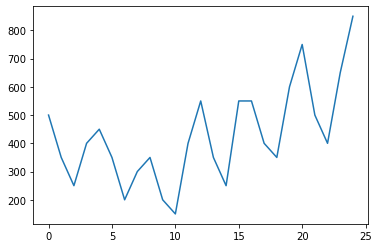

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
asale = pd.read_csv('https://raw.githubusercontent.com/dongyakoh/business_forecasting/main/data/acme_sales.csv')
asale.columns = 'year','quarter','sales'
plt.plot(asale['sales'])
plt.show()

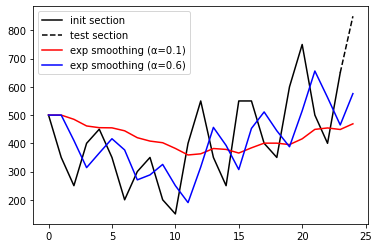

In [2]:
α1 = 0.1
α2 = 0.6
asale['exp1'] = np.nan
asale['exp2'] = np.nan
for t in range(len(asale)):
    if (t==0):
        asale.loc[asale.index[t],'exp1'] = asale.loc[asale.index[t],'sales']
        asale.loc[asale.index[t],'exp2'] = asale.loc[asale.index[t],'sales']
    elif (t==1):
        asale.loc[asale.index[t],'exp1'] = asale.loc[asale.index[t-1],'sales']
        asale.loc[asale.index[t],'exp2'] = asale.loc[asale.index[t-1],'sales']
    else:
        asale.loc[asale.index[t],'exp1'] = α1*asale.loc[asale.index[t-1],'sales'] + (1-α1)*asale.loc[asale.index[t-1],'exp1']
        asale.loc[asale.index[t],'exp2'] = α2*asale.loc[asale.index[t-1],'sales'] + (1-α2)*asale.loc[asale.index[t-1],'exp2']
plt.plot(asale.loc[asale.index[:24],'sales'],'k-',label='init section')
plt.plot(asale.loc[asale.index[23:],'sales'],'k--',label='test section')
plt.plot(asale.loc[asale.index[:25],'exp1'],color='red',label='exp smoothing (α=0.1)')
plt.plot(asale.loc[asale.index[:25],'exp2'],color='blue',label='exp smoothing (α=0.6)')
plt.legend()
plt.show()

In this experiment, we assume that the smoothing parameter $\alpha$ is constant. Since a large number of items are usually being forecast, common practice is to continue with the same value of $\alpha$ for many periods before attempting to determine if a revision is necessary.

A **tracking signal** involves computing a measure of forecast errors over time and setting limits so that, when the cumulative error goes outside those limits, the forecaster is alerted.

A tracking signal is useful to determine when the size of the smoothing constant $\alpha$ should be changed.



## Exponential Smoothing Adjusted for Trend: Holt's Method

- In some situations, the observed data will be clearly trending and contain information that allows the anticipation of future upward movements. If this is the case, we need to incorporate a linear trend into our model.
- Holt's linear exponential smoothing allows the possibility of modeling evolving local linear trends over time.
- One of the advantages of Holt's technique is that it provides a great deal of flexibility in selecting the rates at which the level and trend are tracked.

1. Current level estimate:
\begin{equation}
L_t = \alpha Y_t + (1-\alpha) (L_{t-1} + T_{t-1}) \tag{15}
\end{equation}
1. The trend estimate:
\begin{equation}
T_t = \beta (L_t - L_{t-1}) + (1-\beta) T_{t-1} \tag{16}
\end{equation}
1. The forecast for $p$ periods into the future:
\begin{equation}
\hat{Y}_{t+p} = L_t + p T_t \tag{17}
\end{equation}

To explain the role played by these three equations:
- In equation (15), the current level ($L_t$) is calculated by taking a weighted average ($\alpha$) of two estimates of level --- the current observation ($Y_t$) and the other by adding the previous trend ($T_{t-1}$) to the previously smoothes level ($L_{t-1}$).
- If there is no trend ($T_{t-1}=0$), then the equation reduces to equation (13), an exponential smoothing equation.
- In equation (16), the current trend ($T_t$) is a weighted average (with weights $\beta$ and 1-$\beta$) of two trend estimates --- the change in level from time $t-1$ to $t$ ($L_t - L_{t-1}$) and the previously smoothed trend ($T_{t-1}$).
- In equation (17), the forecast for $p$ periods into the future at time $t$ is computed by multiplying the current trend $T_t$ by the number of periods to be forecast ($p$), and then the product is added to the current level ($L_t$).

<font color="red">Now, we have two smoothing constants, $\alpha$ and $\beta$. How do we choose the right values?</font>

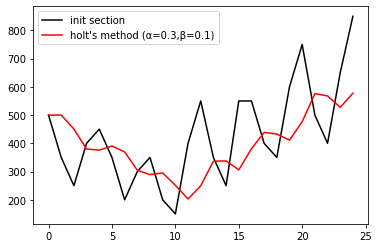

In [20]:
α, β, p = 0.3, 0.1, 1
asale[['L','T','holt']] = np.nan
for t in range(len(asale)-1):
    if (t==0):
        asale.loc[asale.index[t],'L'] = asale.loc[asale.index[t],'sales']
        asale.loc[asale.index[t],'T'] = 0
        asale.loc[asale.index[t],'holt'] = asale.loc[asale.index[t],'L'] + p*asale.loc[asale.index[t],'T']
    else:
        asale.loc[asale.index[t],'L'] = α*asale.loc[asale.index[t],'sales'] + \
                                       (1-α)*(asale.loc[asale.index[t-1],'L']+asale.loc[asale.index[t-1],'T'])
        asale.loc[asale.index[t],'T'] = β*(asale.loc[asale.index[t],'L']-asale.loc[asale.index[t-1],'L']) + \
                                       (1-β)*asale.loc[asale.index[t-1],'T']

    asale.loc[asale.index[t+1],'holt'] = asale.loc[asale.index[t],'L'] + p*asale.loc[asale.index[t],'T']
asale['e_holt'] = asale.sales - asale.holt
plt.plot(asale.sales,'k-',label='init section')
plt.plot(asale.holt,color='red',label='holt\'s method (α=0.3,β=0.1)')
plt.legend()
plt.show()

## Exponential Smoothing Adjusted for Trend and Seasonal Variation: Winters' Method

- The data shows seasonal patterns every year, but the seasonality hasn't been taken into consideration in Holt's method. 
- Winters' three-parameter linear and seasonal exponential smoothing method, an extension of Holt's method, might represent the data better and reduce forecast error.

1. Current level estimate:
\begin{equation}
L_t = \alpha \frac{Y_t}{S_{t-s}} + (1-\alpha) (L_{t-1} + T_{t-1}) \tag{18}
\end{equation}
1. The trend estimate:
\begin{equation}
T_t = \beta (L_t - L_{t-1}) + (1-\beta) T_{t-1} \tag{19}
\end{equation}
1. The seasonality estimate:
\begin{equation}
S_t = \gamma \frac{Y_t}{L_t} + (1-\gamma) S_{t-s} \tag{20}
\end{equation}
1. The forecast for $p$ periods into the future:
\begin{equation}
\hat{Y}_{t+p} = (L_t + p T_t) S_{t-s+p} \tag{21}
\end{equation}

- In Winters' method, one additional equation is used to estimate seasonality.
- Equation 20 shows that to compute the current seasonal component, $S_t$ the product of $\gamma$ and an estimate of the seasonal index given by $Y_t/L_t$ is added to $(1-\gamma)$ times the previous seasonal component, $S_{t-s}$.

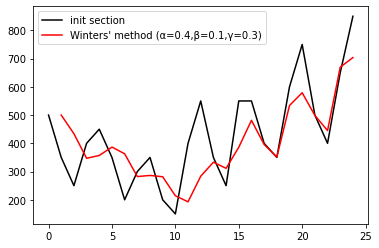

In [35]:
α, β, γ, p = 0.4, 0.1, 0.3, 1
asale[['wL','wT','wS','wint']] = np.nan
asale.wS = 1
for t in range(len(asale)-1):
    if (t==0):
        asale.loc[asale.index[t],'wL'] = asale.loc[asale.index[t],'sales']
        asale.loc[asale.index[t],'wT'] = 0
        asale.loc[asale.index[t+1],'wint'] = asale.loc[asale.index[t],'wL'] + p*asale.loc[asale.index[t],'wT']
    elif (t>0 and t<4):
        asale.loc[asale.index[t],'wL'] = α*asale.loc[asale.index[t],'sales'] + \
                                       (1-α)*(asale.loc[asale.index[t-1],'wL']+asale.loc[asale.index[t-1],'wT'])
        asale.loc[asale.index[t],'wT'] = β*(asale.loc[asale.index[t],'wL']-asale.loc[asale.index[t-1],'wL']) + \
                                       (1-β)*asale.loc[asale.index[t-1],'wT']
        asale.loc[asale.index[t+1],'wint'] = asale.loc[asale.index[t],'wL'] + p*asale.loc[asale.index[t],'wT']
    else:
        asale.loc[asale.index[t],'wL'] = α*asale.loc[asale.index[t],'sales']/asale.loc[asale.index[t-4],'wS'] + \
                                         (1-α)*(asale.loc[asale.index[t-1],'wL']+asale.loc[asale.index[t-1],'wT'])
        asale.loc[asale.index[t],'wT'] = β*(asale.loc[asale.index[t],'wL']-asale.loc[asale.index[t-1],'wL']) + \
                                         (1-β)*asale.loc[asale.index[t-1],'wT']
        asale.loc[asale.index[t],'wS'] = γ*(asale.loc[asale.index[t],'sales']/asale.loc[asale.index[t],'wL']) + \
                                         (1-γ)*asale.loc[asale.index[t-4],'wS']
        asale.loc[asale.index[t+1],'wint'] = (asale.loc[asale.index[t],'wL'] + p*asale.loc[asale.index[t],'wT']) \
                                             *asale.loc[asale.index[t-3],'wS']

asale['e_wint'] = asale.sales - asale.wint
plt.plot(asale.sales,'k-',label='init section')
plt.plot(asale.wint,color='red',label='Winters\' method (α=0.4,β=0.1,γ=0.3)')
plt.legend()
plt.show()

- Winters method is one way to incorporate seasonal patterns to forecast.
- An alternative method consists of first deseasonalizaing or seasonally adjusting the data. Deseasonalizing is a process that removes the effects of seasonality from the raw data.
- The forecsting model is then applied to the deseasonalized data.